<a href="https://colab.research.google.com/github/Murarin8877/FinancialBigDataAnalysis-homework/blob/main/week11%E4%BD%9C%E6%A5%AD_%E5%A4%9A%E6%A8%A1%E6%85%8B_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#資料處理

In [1]:
import pandas as pd
import numpy as np

# 加載數據集
stock_data = pd.read_csv('DJIA_table(train).csv')  # 替換為股價資料的文件路徑
news_data = pd.read_csv('Combined_News_DJIA(train).csv')    # 替換為新聞情緒指標文件路徑

#限制news_data的資料欄位只到top10
stock_data = stock_data[['Date', 'Close']]
news_data = news_data.iloc[:, :11]
# 合併數據集（假設有共同的日期字段）
# 統一新聞資料集日期格式
news_data['Date'] = pd.to_datetime(news_data['Date'])

# 統一股價資料集日期格式
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

data = pd.merge(stock_data, news_data, on='Date', how='inner')

# 確認數據結構
data.set_index('Date', inplace=True)

#將data 從最後一筆開始
data = data.iloc[::-1]
#data只抓取100筆資料
data = data.iloc[:100]
data.head()

<ipython-input-1-36054879ab0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')


,Close,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9
Date,,,,,,,,,,,
2008-08-08,11734.32031,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...
2008-08-11,11782.34961,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...
2008-08-12,11642.46973,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ..."
2008-08-13,11532.95996,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s..."
2008-08-14,11615.92969,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

In [3]:
# 數值模態特徵
scaler = MinMaxScaler()
close_prices = data['Close'].values.reshape(-1, 1)
close_prices_scaled = scaler.fit_transform(close_prices)

# 滾動窗口創建數值特徵
def create_sequences(data, time_steps=5):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps, 0])  # 前 time_steps 天的數據
        labels.append(data[i + time_steps, 0])      # 第 time_steps+1 天的數據
    return np.array(sequences), np.array(labels)

X_price, y_price = create_sequences(close_prices_scaled, time_steps=5)

# 文本模態特徵（合併 Top1 至 Top4）
data['Combined_News'] = data[['Top1', 'Top2', 'Top3', 'Top4']].apply(
    lambda x: ' '.join(x.astype(str)), axis=1
)
news_features = data['Combined_News'][:len(y_price)].tolist()

# 保證數據對齊
assert len(X_price) == len(news_features) == len(y_price)

# 初始化 BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#自定義 Dataset

In [4]:
import torch
from torch.utils.data import Dataset

class MultiModalDataset(Dataset):
    def __init__(self, price_data, text_data, labels, tokenizer, max_len=128):
        self.price_data = torch.tensor(price_data, dtype=torch.float32)
        self.text_data = text_data
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        price_data = self.price_data[idx]
        text = self.text_data[idx]
        label = self.labels[idx]

        # 文本特徵處理
        text_data = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return price_data, {key: val.squeeze(0) for key, val in text_data.items()}, label


#模型架構(前期融合)

In [5]:
from transformers import BertModel
import torch.nn as nn

class MultiModalModel(nn.Module):
    def __init__(self):
        super(MultiModalModel, self).__init__()
        # 文本模態分支（BERT）
        self.text_branch = BertModel.from_pretrained('bert-base-uncased')

        # 融合層（直接處理文本 + 數值模態）
        self.fusion_layer = nn.Sequential(
            nn.Linear(768 + 5, 128),  # 768 是 BERT 的輸出維度，5 是數值模態的時間步
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  # 單輸出層，用於回歸
        )

    def forward(self, price_data, text_data):
        # 文本模態處理
        text_outputs = self.text_branch(**text_data)
        text_features = text_outputs.pooler_output  # 使用 BERT CLS 標籤嵌入

        # 前期融合：拼接數值模態和文本模態
        combined_features = torch.cat((price_data, text_features), dim=1)

        # 融合層處理
        output = self.fusion_layer(combined_features)
        return output


#訓練和驗證模型

In [9]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# 拆分數據集
X_train_price, X_test_price, y_train, y_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)
train_text = news_features[:len(y_train)]
test_text = news_features[len(y_train):]

# 創建 Dataset 和 DataLoader
train_dataset = MultiModalDataset(X_train_price, train_text, y_train, tokenizer)
test_dataset = MultiModalDataset(X_test_price, test_text, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 訓練模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiModalModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for price_data, text_data, labels in train_loader:
        price_data = price_data.to(device)
        labels = labels.to(device)
        text_data = {key: val.to(device) for key, val in text_data.items()}

        outputs = model(price_data, text_data).squeeze()
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# 測試模型
model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for price_data, text_data, labels in test_loader:
        price_data = price_data.to(device)
        labels = labels.to(device)
        text_data = {key: val.to(device) for key, val in text_data.items()}

        # 確保輸出形狀為 (batch_size,)
        outputs = model(price_data, text_data).view(-1)
        #反標準化
        # 反標準化，確保數據為 2D 數組
        predictions.extend(scaler.inverse_transform(outputs.cpu().numpy().reshape(-1, 1)).flatten())
        actuals.extend(scaler.inverse_transform(labels.cpu().numpy().reshape(-1, 1)).flatten())
        print(predictions,actuals)





Epoch 1/5, Loss: 0.3482
Epoch 2/5, Loss: 0.1865
Epoch 3/5, Loss: 0.1130
Epoch 4/5, Loss: 0.0888
Epoch 5/5, Loss: 0.0831
[8971.248, 8935.667, 8852.355, 8857.629, 8927.452, 8844.788, 8906.631, 8959.647, 8882.188, 8922.682, 8935.569, 8940.18, 8954.322, 8896.004, 8950.114, 8887.892, 8995.299, 8896.072, 8968.117] [7552.29, 10609.661, 8726.61, 8829.041, 11659.9, 10854.171, 9387.61, 8577.91, 11543.96, 9265.43, 8564.53, 9319.83, 8761.42, 8519.21, 11532.881, 11430.211, 11433.71, 11022.06, 8451.19]


#可視化

Length of actuals: 19
Length of predictions: 19
Length of test index: 24


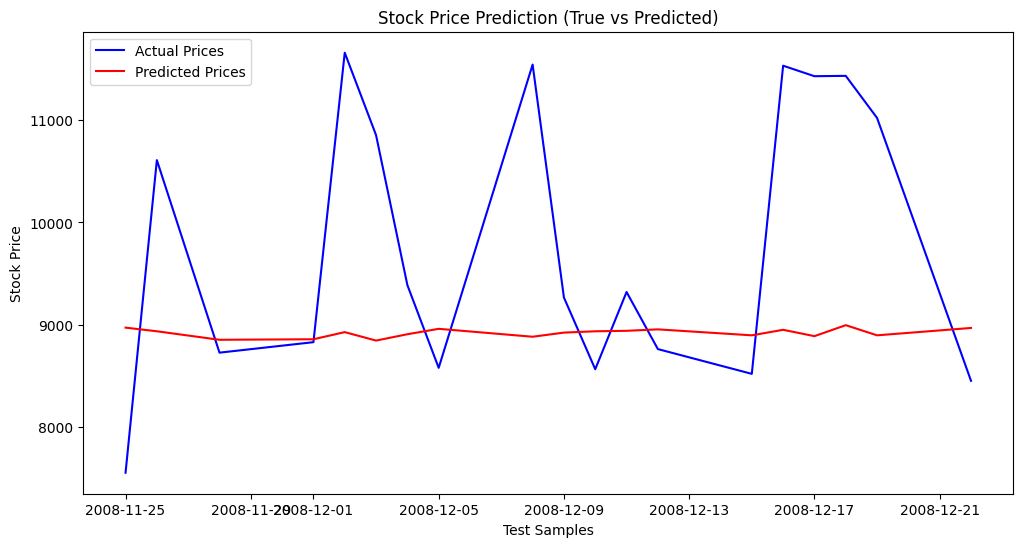

In [15]:
import matplotlib.pyplot as plt
# 確保 actuals 和 predictions 的長度一致
print(f"Length of actuals: {len(actuals)}")
print(f"Length of predictions: {len(predictions)}")
print(f"Length of test index: {len(data.index[len(y_train):])}")

# 確保索引和實際值對齊
test_index = data.index[len(y_train):len(y_train) + len(actuals)]

# 可視化結果
plt.figure(figsize=(12, 6))
plt.plot(test_index, actuals, label="Actual Prices", color='blue')
plt.plot(test_index, predictions, label="Predicted Prices", color='red')
plt.xlabel("Test Samples")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction (True vs Predicted)")
plt.legend()
plt.show()


In [8]:
for i in range(len(predictions)):
    print(f"Actual: {actuals[i]}, Predicted: {predictions[i]}")

Actual: 7552.2900390625, Predicted: 9836.24609375
Actual: 10609.6611328125, Predicted: 9729.375
Actual: 8726.6103515625, Predicted: 9874.8740234375
Actual: 8829.041015625, Predicted: 9830.8251953125
Actual: 11659.900390625, Predicted: 9848.0126953125
Actual: 10854.1708984375, Predicted: 9811.3232421875
Actual: 9387.6103515625, Predicted: 9767.2919921875
Actual: 8577.91015625, Predicted: 9741.5263671875
Actual: 11543.9599609375, Predicted: 9811.986328125
Actual: 9265.4296875, Predicted: 9813.3076171875
Actual: 8564.5302734375, Predicted: 9759.6865234375
Actual: 9319.830078125, Predicted: 9853.48046875
Actual: 8761.419921875, Predicted: 9824.7666015625
Actual: 8519.2099609375, Predicted: 9784.9765625
Actual: 11532.880859375, Predicted: 9735.97265625
Actual: 11430.2109375, Predicted: 9853.40625
Actual: 11433.7099609375, Predicted: 9786.59375
Actual: 11022.0595703125, Predicted: 9841.5361328125
Actual: 8451.1904296875, Predicted: 9741.5537109375


In [12]:
data.index[len(y_train):]

DatetimeIndex(['2008-11-25', '2008-11-26', '2008-11-28', '2008-12-01',
               '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05',
               '2008-12-08', '2008-12-09', '2008-12-10', '2008-12-11',
               '2008-12-12', '2008-12-15', '2008-12-16', '2008-12-17',
               '2008-12-18', '2008-12-19', '2008-12-22', '2008-12-23',
               '2008-12-24', '2008-12-26', '2008-12-29', '2008-12-30'],
              dtype='datetime64[ns]', name='Date', freq=None)